In [6]:
%display latex

In [1]:
from itertools import product
from itertools import combinations
from collections import defaultdict
import time
import sage.graphs.graph_plot

In [2]:
n =5
q = 2
#FF = GF(9,'c')
FF = GF(q)
so = FF.cardinality()^n-1
thm = (FF.cardinality()^n-1)^(n-1)
mult = (q-1)^(n-1)*(add([q^i for i in range(n)])^(n-2))
G = GL(n, FF)
M = MatrixSpace(FF,n,n)
V = VectorSpace(FF,n)
fact = (q^n-1)^(n-1)
nq=gaussian_binomial(n,1,q=q)

def get_hyperplanes(): #generate all hyperplanes of gl(n,q)
    H = []
    for i in range(n):
        h = matrix(FF,n-1,n)
        for j in range(n):
            if j<i:
                h[j,j] = 1
            if j>i:
                h[j-1,j] = 1
        if i >0:
            comblist = [p for p in product(GF(q), repeat=i)]
            num = len(comblist)
            for k in range(num):
                b = h
                v = comblist[k]
                for l in range(i):
                    b[l,i] = v[l]
                H.append(copy(b))
        else: H.append(h)
    return H

def get_singer(): #find all singer cycles in a list
    S = []
    for g in G:
        if g.multiplicative_order() == so:
            S.append(g)
    return S

def get_reg_ells():
    S = []
    #D = defaultdict(int)
    #D2 = defaultdict(tuple)
    for g in G:
        A = M(g)
        cp = A.charpoly()
        if cp.is_irreducible():
            #D[cp] += 1
            #D2[cp] += (g,)
            S.append(g)
    return S

def sing_with_det(alp):
    c1=[]
    for c in L:
        if c.matrix().determinant() == alp:
            c1.append(c)
    return c1

def insert_row(M,k,row):
    return matrix(FF,M.rows()[:k]+[row]+M.rows()[k:])

def get_reg_ells():
    S = []
    D = defaultdict(int)
    D2 = defaultdict(tuple)
    for g in G:
        A = M(g)
        cp = A.charpoly()
        if cp.is_irreducible():
            D[cp] += 1
            D2[cp] += (g,)
            S.append(g)
    return S, D, D2

#generate 1-dim vectors
def get_v1():
    H=get_hyperplanes()
    vec=[]
    for h in H:
        m=transpose(matrix(FF,h))
        v=kernel(m)
        vec.append(v)
    return vec

In [3]:
H=get_hyperplanes()

In [6]:
#h1,h2=matrix(FF,[[0,1]]), matrix(FF,[1,0])
h1,h2,h3,h4,h5=matrix(FF,[[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]),matrix(FF,[[1,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]), matrix(FF,[[1,0,0,0,0],[0,1,0,0,0],[0,0,0,1,0],[0,0,0,0,1]]),matrix(FF,[[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,0,1]]), matrix(FF,[[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0]])
Hlist = [h1,h2,h3,h4,h5]

#First, try to build all possible invertible matrices with a fixed diagonal support. det (1,2,1,1)
def invertible_vi(dlist):
    Vm =[]
    comblist = [p for p in product(GF(q), repeat=n-1)]
    [d1,d2,d3,d4,d5]=dlist
    
    for c in comblist:
        m = matrix(FF,n)
        m[0,0],m[1,0],m[2,0],m[3,0],m[4,0] = d1-1,c[0],c[1],c[2],c[3]
        for d in comblist:
            m[0,1],m[1,1],m[2,1],m[3,1],m[4,1] = d[0],d2-1,d[1],d[2],d[3]
            for e in comblist:
                m[0,2],m[1,2],m[2,2],m[3,2],m[4,2] = e[0],e[1],d3-1,e[2],e[3]
                for l in comblist:
                    m[0,3],m[1,3],m[2,3],m[3,3],m[4,3] = l[0],l[1],l[2],d4-1,l[3]
                    for p in comblist:
                        m[0,4],m[1,4],m[2,4],m[3,4],m[4,4] = p[0],p[1],p[2],p[3],d5-1
                        if m in G:
                            Vm.append(copy(m))

#     for c in comblist:
#         m = matrix(FF,n)
#         m[0,0],m[1,0] = d1-1,c[0]
#         for d in comblist:
#             m[0,1],m[1,1]= d[0],d2-1
#             # for e in comblist:
# #                     m[0,2],m[1,2],m[2,2] = e[0],e[1],d3-1
#             if m in G:
#                  Vm.append(copy(m))
    allv = []
    for m in Vm:
        Rlist = []
        for i in range(n):
            v=vector(m[:,i])
            v[i]=v[i]+1
            v =vector(FF,v)
            hyp = insert_row(Hlist[i],i,v)
            ref = matrix(FF, hyp)
            Rlist.append(ref)
        allv.append(Rlist)
    return allv



def get_regell():
    fact = []
    reg= []
    notfact=[]
    notreg=[]
    for r in allv:
        c = r[0]*r[1]*r[2]*r[3]*r[4]
        f= matrix(c).charpoly()
        #if f == g:
        if f.is_irreducible():
        #if c.multiplicative_order() == so:
            fact.append(r)
            reg.append(c)
        else:
            notfact.append(r)
            notreg.append(c)
    return fact,reg,notfact,notreg


#singer/regellp with a fixed charpoly poly g
def get_singer_conj(g):
    #g=sing[10].charpoly()
    fact_g=[]
    sing_g=[]
    for rr in fact:
        c=rr[0]*rr[1]*rr[2]*rr[3]*rr[4]
        f=matrix(c).charpoly()
        if f == g:
            fact_g.append(rr)
            sing_g.append(c)
    return fact_g,sing_g

In [5]:
#SetUp: first need to generate the factorization of a singer with charpoly g, and determinant dlist

In [7]:
#change the determiant list

allv=invertible_vi([1,1,1,1,1])
fact,reg,notfact,notreg=get_regell()

In [8]:
sing=[]
for g in reg:
    if g.multiplicative_order() == so:
        sing.append(g)

In [9]:
len(sing),len(reg)

(178746, 178746)

In [11]:
#fact = factorization, c = singer
#returns the cyclic orbit
def cyclic_orbit(fact, c):
    cyclic=[]
    while 1:
        f = fact[-1]
        fact.remove(f)
        fact.insert(0,c*f*c^(-1))
        if fact not in cyclic:
            cyclic.append(copy(fact))
        else:
            break
    return cyclic

In [15]:
cyc=cyclic_orbit(fact[0],prod(fact[0]))

In [17]:
len(cyc)

155

In [10]:
conju=[]
for c in sing:
    f=c.charpoly()
    if f not in conju:
        conju.append(f)
conju

[x^5 + x^4 + x^3 + x^2 + 1,
 x^5 + x^3 + x^2 + x + 1,
 x^5 + x^4 + x^2 + x + 1,
 x^5 + x^3 + 1,
 x^5 + x^4 + x^3 + x + 1,
 x^5 + x^2 + 1]

In [11]:
g=conju[0]
fact_g,sing_g=get_singer_conj(g)

In [12]:
len(fact_g)

29791

In [157]:
fact_gg=fact_g
m1=matrix(FF,[[1,0,0],[0,2,0],[0,0,1]])
#m5=matrix(FF,[[1,0,0],[0,3,0],[0,0,1]])
#m6=matrix(FF,[[1,0,0],[0,4,0],[0,0,1]])
m2=matrix(FF,[[2,0,0],[0,1,0],[0,0,1]])
#m7=matrix(FF,[[3,0,0],[0,1,0],[0,0,1]])
#m8=matrix(FF,[[4,0,0],[0,1,0],[0,0,1]])
m3=matrix(FF,[[1,0,0],[0,1,0],[0,0,2]])
#m9=matrix(FF,[[1,0,0],[0,1,0],[0,0,3]])
#m10=matrix(FF,[[1,0,0],[0,1,0],[0,0,4]])
#m11=matrix(FF,[[1,0,0],[0,2,0],[0,0,3]])
#m12=matrix(FF,[[1,0,0],[0,2,0],[0,0,4]])
#m13=matrix(FF,[[1,0,0],[0,3,0],[0,0,4]])
#m14=matrix(FF,[[1,0,0],[0,3,0],[0,0,2]])
# m15=matrix(FF,[[1,0,0],[0,4,0],[0,0,2]])
# m16=matrix(FF,[[1,0,0],[0,4,0],[0,0,3]])
m4=matrix(FF,[[1,0,0],[0,1,0],[0,0,1]])
diag=[m1,m2,m3,m4]
newlist=[]
while len(fact_gg)>0:
    for rrr in fact_gg:
        conj=[]
        for m in diag:
            new=[]
            for r in rrr:
                r1=m^(-1)*r*m
                new.append(r1)
            fact_gg.remove(new)
            conj.append(new)
        newlist.append(conj)

In [158]:
len(newlist)

13

In [ ]:
## or input your own choice of r1,r2,r3
# r1=matrix(FF,[[1,1,1,1],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
# r2=matrix(FF,[[1, 0, 0, 0],[1, 1, 1,1],[0, 0, 1, 0],[0,0,0,1]])
# r3=matrix(FF,[[1, 0, 0,0],[0, 1,0, 0],[0,0,1, 1],[0,0,0,1]])
# r4=matrix(FF,[[1,0,0,0], [0,1,0,0],[0,0,1,0],[1,1,1,1]])
# c=r1*r2*r3*r4
# c.multiplicative_order()

In [ ]:
# RR = [r1,r2,r3,r4]
# for p in Permutations(4):
#     c = mul([RR[pp-1] for pp in p])
#     matrix(c).charpoly().is_irreducible()
# #c=r2*r3*r4*r1
# #c.multiplicative_order()

In [13]:
vec=get_v1()
#newvec=[vec[3],vec[1],vec[4],vec[0],vec[-2],vec[2],vec[-1]]
newvec=vec

In [14]:

label = []
for v in newvec:
    v1=v.basis()
    label.append(v1)
vertex={}
for v in range(nq):
    vertex[v]=str(label[v][0])

def get_edge(r):
    edge=[]
    for v in newvec:
            w = v*r
            if v!=w:
                edge.append([newvec.index(v),newvec.index(w)])
    return edge

#input a factorzation [r1,r2,r3]
def get_edges(rrr):
    edges=[]
    for i in range(n):
        edge=get_edge(rrr[i])
        edges.append(edge)
    return edges

#n_q x n_q matrix, put 1 for each edge correspondnce to build the adjacency matrix for each r_i
def adj_matrix(edge):
    M=matrix(nq)
    for e in edge:
        M[e[0],e[1]]=1
    return M

def get_adj_matrix(rrr):
    edges=get_edges(rrr)
    Mlist=[]
    for i in range(n):
        M2=matrix(nq)
        for e in edges[i]:
            M2[e[0],e[1]]=1
        Mlist.append(M2)
    return Mlist

In [12]:
# def is_reflection(g):
#     n = G.degree()
#     M = g.matrix() - (G[0]^0).matrix()
#     KM = M.kernel()
#     return KM.dimension() == n-1

# def is_transvection(g):
#     return is_reflection(g) and M(g).det() == 1


# def get_transvections(): #find all transvection in a list
#     R = []
#     for g in G:
#         if is_transvection(g):
#             R.append(g)
#     return R

# def get_refls(): #find all reflections in a list
#     R = []
#     while len(R)<5:
#         for g in G:
#             if is_reflection(g):
#                 R.append(g)
#     return R

In [93]:
# r1=matrix(FF,[[2,0,1],[0,1,0],[0,0,1]])
# r2=matrix(FF,[[1,0,0],[2,2,0],[0,0,1]])
# r3=matrix(FF,[[1,0,0],[0,1,0],[0,2,2]])
# r4=matrix(FF,[[1,0,0],[0,1,0],[0,1,2]])
# c=r1*r2*r3
# c1=r1*r2*r4
# c.charpoly().is_irreducible(),c1.charpoly().is_irreducible()

(True, False)

In [78]:
g

x^3 + x + 1

In [163]:
singer=[]
for rrr in newlist:
    c=prod(rrr[1])
    singer.append(c)


In [15]:
GG = SymmetricGroup(nq)

In [16]:
total=[]
for rrr in fact_g:    
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_directed()
        #G.show()
        cycle = G.all_simple_cycles()
        #print(edge)
        tup=[]
        for c in cycle:
            newc=[x+1 for x in c[1:]]
            tup.append(tuple(newc))
        #print(tup)
        refl = GG(tup)
        symm.append(refl)
    #print(symm,prod(symm))
    total.append(symm)

In [29]:
total[0]

[(1,24)(3,28)(6,26)(7,30)(12,25)(13,27)(14,29)(15,31),
 (2,10)(3,14)(5,11)(7,15)(20,21)(22,23)(28,29)(30,31),
 (4,5)(6,7)(9,11)(13,15)(18,22)(19,23)(26,30)(27,31),
 (8,19)(9,17)(10,23)(11,21)(12,27)(13,25)(14,31)(15,29),
 (16,25)(17,24)(18,27)(19,26)(20,29)(21,28)(22,31)(23,30)]

In [19]:
rr1=[]
rr2=[]
rr3=[]
rr4=[]
rr5=[]
for f in total:
    if f[0] not in rr1:
        rr1.append(f[0])
    if f[1] not in rr2:
        rr2.append(f[1])
    if f[2] not in rr3:
        rr3.append(f[2])
    if f[3] not in rr4:
        rr4.append(f[3])
    if f[4] not in rr5:
        rr5.append(f[4])

In [56]:
rlist=[rr1,rr2,rr3,rr4,rr5]

In [68]:
GG

Symmetric group of order 31! as a permutation group

In [78]:
rlist_cut=[]
for rr in rlist:
    rr_cut=[]
    for r in rr:
        new=r[1:]
        rr_cut.append(GG(new))
    rlist_cut.append(rr_cut)
        
        

ValueError: Invalid permutation vector: [(3,28), (6,26), (7,30), (12,25), (13,27), (14,29), (15,31)]

In [72]:
GG([(3,28), (6,26), (7,30), (12,25), (13,27), (14,29), (15,31)])

(3,28)(6,26)(7,30)(12,25)(13,27)(14,29)(15,31)

In [64]:
cyc=[]
for i,j,k,l,m in product(range(15), repeat=5):
    c = rlist_cut[0][i]*rlist_cut[1][j]*rlist_cut[2][k]*rlist_cut[3][l]*rlist_cut[4][m]
    if c.cycle_type() == [31]:
        cyc.append(c)
len(cyc)
    

TypeError: can't multiply sequence by non-int of type 'list'

In [42]:
172800/6

28800

In [44]:
(31^3)*6

178746

In [166]:
for rrr in fact_g:    
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_directed()
        #G.show()
        cycle = G.all_simple_cycles()
        #print(edge)
        tup=[]
        for c in cycle:
            newc=[x+1 for x in c[1:]]
            tup.append(tuple(newc))
        #print(tup)
        refl = GG(tup)
        symm.append(refl)
    print(symm,prod(symm))

[(1,8)(3,9)(4,10)(12,13), (2,3)(6,10)(7,12)(9,13), (5,6)(8,12)(9,11)(10,13)] (1,12,11,9,2,3,10,4,5,6,13,7,8)
[(1,8)(3,9)(4,10)(12,13), (2,12)(3,6)(4,9)(7,10), (5,12)(6,11)(7,13)(8,9)] (1,9,11,6,3,4,13,2,5,12,7,10,8)
[(1,8)(3,9)(4,10)(12,13), (2,10)(3,7)(4,13)(6,12), (5,9)(6,8)(7,10)(11,12)] (1,6,11,12,4,2,7,3,5,9,10,13,8)
[(1,8)(3,9)(4,10)(12,13), (2,4)(6,13)(7,9)(10,12), (5,7)(8,13)(9,12)(10,11)] (1,13,11,10,2,4,9,3,5,7,12,6,8)
[(1,8)(3,9)(4,10)(12,13), (2,9)(3,12)(4,6)(7,13), (5,10)(6,9)(7,8)(11,13)] (1,7,11,13,3,2,6,4,5,10,9,12,8)
[(1,8)(3,9)(4,10)(12,13), (2,13)(3,10)(4,7)(6,9), (5,13)(6,12)(7,11)(8,10)] (1,10,11,7,4,3,12,2,5,13,6,9,8)
[(1,11)(3,13)(4,12)(9,10), (2,3)(6,10)(7,12)(9,13), (5,7)(8,13)(9,12)(10,11)] (1,10,8,13,2,3,12,4,5,7,9,6,11)
[(1,11)(3,13)(4,12)(9,10), (2,12)(3,6)(4,9)(7,10), (5,13)(6,12)(7,11)(8,10)] (1,7,8,10,4,2,6,3,5,13,12,9,11)
[(1,11)(3,13)(4,12)(9,10), (2,10)(3,7)(4,13)(6,12), (5,10)(6,9)(7,8)(11,13)] (1,13,8,7,3,4,9,2,5,10,6,12,11)
[(1,11)(3,13)(4,12)(9,10

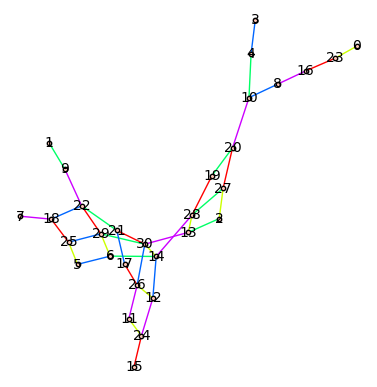

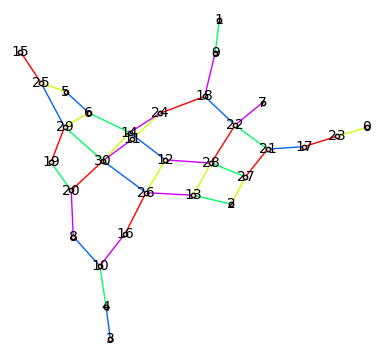

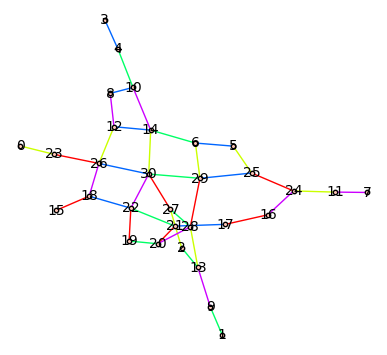

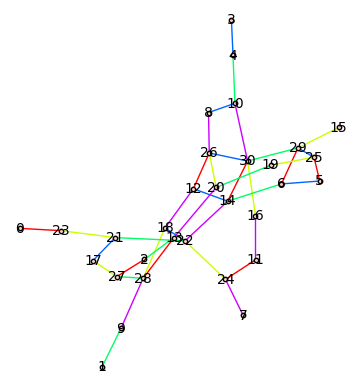

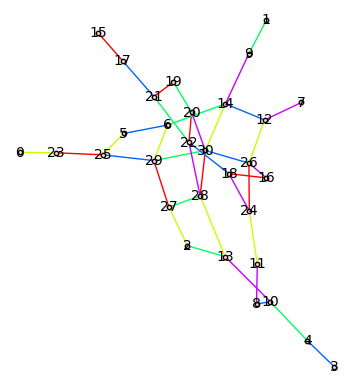

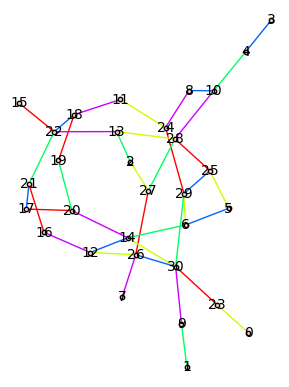

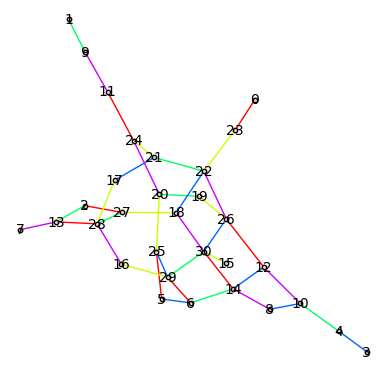

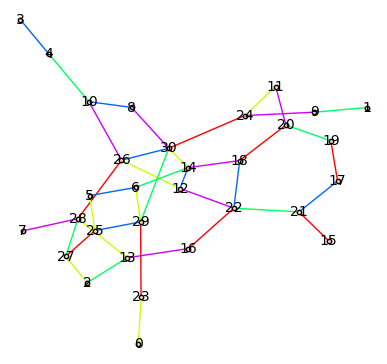

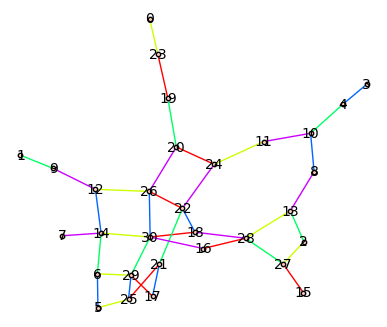

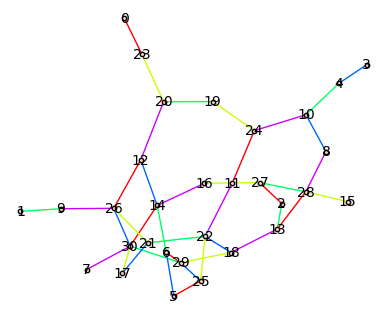

In [38]:
vertex

for rrr in fact_g[0:10]:    
    [M1,M2,M3,M4,M5]=get_adj_matrix(rrr)
    Dlist=DiGraph(M1),DiGraph(M2),DiGraph(M3),DiGraph(M4),DiGraph(M5)
    alledge=[]
    for i in range(n):
        for u,v,l in Dlist[i].edges():
            Dlist[i].set_edge_label(u,v,str(i))
        alledge = alledge+Dlist[i].edges()
    D=DiGraph()
    D.add_edges(alledge)
    #D.relabel(vertex)
    G=D.to_undirected()
    G.graphplot(color_by_label=True,vertex_size=10,layout='spring').show()

In [31]:
def labeled_tree2fact(ep):
    return [(e[0]+1,e[1]+1) for e in ep]

GG=SymmetricGroup(nq)

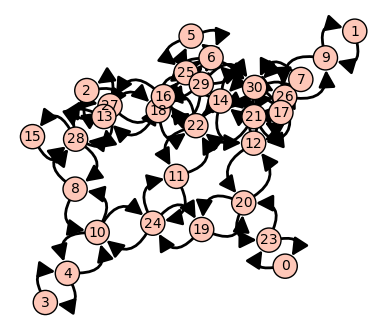

In [52]:
def is_reflection(g):
    n = G.degree()
    M = g.matrix() - (G[0]^0).matrix()
    KM = M.kernel()
    return KM.dimension() == n-1

def is_transvection(g):
    return is_reflection(g) and M(g).determinant() == 1


def get_transvections(): #find all transvection in a list
    R = []
    for g in G:
        if is_transvection(g):
            R.append(g)
    return R

def get_refls(): #find all reflections in a list
    R = []
    for g in G:
        if is_reflection(g):
            R.append(g)
    return R
def get_fact(R,c):#given a list of reflections and a singer cycle returns the list of factorization in reflections
    F = []
    for i in product(range(len(R)),repeat = G.degree()):
        if mul([R[i[k]] for k in range(G.degree())]) == c:
            F.append([R[i[k]] for k in range(G.degree())])
    return F

In [59]:
R=get_refls()
fact1=get_fact(R,sing[0])

In [60]:
len(fact1)

49

In [132]:
#for new in fact_g:
    #print('space')
for rrr in fact1:  
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_undirected()
        edge = labeled_tree2fact(G.edges())
        refl = GG(edge)
        symm.append(refl)
    print(symm,prod(symm))

[(1,4)(2,7), (1,6)(3,4), (4,5)(6,7)] (1,3,5,4,7,2,6)
[(1,4)(2,7), (1,7)(3,5), (1,6)(3,4)] (1,3,5,4,7,2,6)
[(1,4)(2,7), (4,5)(6,7), (1,7)(3,5)] (1,3,5,4,7,2,6)
[(2,4)(3,5), (1,4)(2,7), (1,6)(3,4)] (1,3,5,4,7,2,6)
[(2,4)(3,5), (1,6)(3,4), (2,7)(3,6)] (1,3,5,4,7,2,6)
[(2,4)(3,5), (2,7)(3,6), (1,3)(4,6)] (1,3,5,4,7,2,6)
[(2,4)(3,5), (1,3)(4,6), (1,4)(2,7)] (1,3,5,4,7,2,6)
[(1,6)(3,4), (2,6)(3,7), (2,3)(4,5)] (1,3,5,4,7,2,6)
[(1,6)(3,4), (2,7)(3,6), (4,5)(6,7)] (1,3,5,4,7,2,6)
[(1,6)(3,4), (4,5)(6,7), (2,6)(3,7)] (1,3,5,4,7,2,6)
[(1,6)(3,4), (2,3)(4,5), (2,7)(3,6)] (1,3,5,4,7,2,6)
[(1,3)(5,7), (1,6)(2,5), (4,7)(5,6)] (1,3,5,4,7,2,6)
[(1,3)(5,7), (1,5)(2,6), (1,2)(4,7)] (1,3,5,4,7,2,6)
[(1,3)(5,7), (1,2)(4,7), (1,6)(2,5)] (1,3,5,4,7,2,6)
[(1,3)(5,7), (4,7)(5,6), (1,5)(2,6)] (1,3,5,4,7,2,6)
[(1,7)(3,5), (1,6)(3,4), (2,6)(3,7)] (1,3,5,4,7,2,6)
[(1,7)(3,5), (2,6)(3,7), (1,2)(4,7)] (1,3,5,4,7,2,6)
[(1,7)(3,5), (1,2)(4,7), (1,6)(3,4)] (1,3,5,4,7,2,6)
[(1,6)(2,5), (2,4)(3,5), (2,7)(3,6)] (1,3,5,4,

In [47]:
vertex

{0: '(1, 0, 0)',
 1: '(0, 1, 0)',
 2: '(1, 2, 0)',
 3: '(1, 1, 0)',
 4: '(0, 0, 1)',
 5: '(0, 1, 2)',
 6: '(0, 1, 1)',
 7: '(1, 0, 2)',
 8: '(1, 1, 2)',
 9: '(1, 2, 2)',
 10: '(1, 0, 1)',
 11: '(1, 2, 1)',
 12: '(1, 1, 1)'}

In [43]:
#for new in fact_g:
    #print('space')
for rrr in fact_g:  
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_undirected()
        edge = labeled_tree2fact(G.edges())
        refl = GG(edge)
        symm.append(refl)
    print(symm,prod(symm))

[(1,8)(3,9)(4,10)(12,13), (2,3)(6,10)(7,12)(9,13), (5,6)(8,12)(9,11)(10,13)] (1,12,11,9,2,3,10,4,5,6,13,7,8)
[(1,8)(3,9)(4,10)(12,13), (2,12)(3,6)(4,9)(7,10), (5,12)(6,11)(7,13)(8,9)] (1,9,11,6,3,4,13,2,5,12,7,10,8)
[(1,8)(3,9)(4,10)(12,13), (2,10)(3,7)(4,13)(6,12), (5,9)(6,8)(7,10)(11,12)] (1,6,11,12,4,2,7,3,5,9,10,13,8)
[(1,8)(3,9)(4,10)(12,13), (2,4)(6,13)(7,9)(10,12), (5,7)(8,13)(9,12)(10,11)] (1,13,11,10,2,4,9,3,5,7,12,6,8)
[(1,8)(3,9)(4,10)(12,13), (2,9)(3,12)(4,6)(7,13), (5,10)(6,9)(7,8)(11,13)] (1,7,11,13,3,2,6,4,5,10,9,12,8)
[(1,8)(3,9)(4,10)(12,13), (2,13)(3,10)(4,7)(6,9), (5,13)(6,12)(7,11)(8,10)] (1,10,11,7,4,3,12,2,5,13,6,9,8)
[(1,11)(3,13)(4,12)(9,10), (2,3)(6,10)(7,12)(9,13), (5,7)(8,13)(9,12)(10,11)] (1,10,8,13,2,3,12,4,5,7,9,6,11)
[(1,11)(3,13)(4,12)(9,10), (2,12)(3,6)(4,9)(7,10), (5,13)(6,12)(7,11)(8,10)] (1,7,8,10,4,2,6,3,5,13,12,9,11)
[(1,11)(3,13)(4,12)(9,10), (2,10)(3,7)(4,13)(6,12), (5,10)(6,9)(7,8)(11,13)] (1,13,8,7,3,4,9,2,5,10,6,12,11)
[(1,11)(3,13)(4,12)(9,10

In [145]:
fact_g[1],prod(fact_g[1])

(
[[1 0 1]                 
[0 1 0]                  
[0 0 1], [1 0 0]         
[1 1 1]                  
[0 0 1], [1 0 0]  [1 1 1]
[0 1 0]           [1 0 1]
[0 1 1]]        , [0 1 1]
)

In [104]:
#for new in fact_g:
    #print('space')
for rrr in fact_g:  
    symm=[]
    Mlist =get_adj_matrix(rrr)
    for m in Mlist:
        D= DiGraph(m)
        G=D.to_undirected()
        edge = labeled_tree2fact(G.edges())
        refl = GG(edge)
        symm.append(refl)
    print(symm,prod(symm))

[(4,5)(6,7), (2,6)(3,7), (1,7)(3,5)] (1,7,2,6,5,4,3)
[(4,5)(6,7), (2,7)(3,6), (1,3)(5,7)] (1,3,6,2,5,4,7)
[(4,6)(5,7), (2,3)(6,7), (1,5)(3,7)] (1,5,6,4,3,2,7)
[(4,6)(5,7), (2,7)(3,6), (1,7)(3,5)] (1,7,3,6,4,5,2)
[(4,7)(5,6), (2,3)(6,7), (1,7)(3,5)] (1,7,4,6,3,2,5)
[(4,7)(5,6), (2,6)(3,7), (1,3)(5,7)] (1,3,5,2,6,7,4)
[(4,7)(5,6), (2,7)(3,6), (1,5)(3,7)] (1,5,7,4,2,3,6)


In [82]:
GG((4,5))

NameError: name 'GG' is not defined

In [5]:
m = 5
vars = ['w%i' % i for i in range(1, m+1)]
RR = PolynomialRing(QQ, m, vars)
w = {i+1: var for i, var in enumerate(RR.gens())}
# w[i] would then be  wi

In [171]:
(w[1]+w[2]+w[3])^3

w1^3 + 3*w1^2*w2 + 3*w1*w2^2 + w2^3 + 3*w1^2*w3 + 6*w1*w2*w3 + 3*w2^2*w3 + 3*w1*w3^2 + 3*w2*w3^2 + w3^3

In [73]:
f= 120*w[1]*w[2]*w[3] + 384*w[2]^2*w[3] + 48*w[1]*w[3]^2 + 456*w[2]*w[3]^2 + 168* w[3]^3

In [81]:
f/(4*w[3])

30*w1*w2 + 96*w2^2 + 12*w1*w3 + 114*w2*w3 + 42*w3^2

In [69]:
(5*w[2]+2*w[3])*(3*w[1]+7*w[2]+18*w[3])

15*w1*w2 + 21*w2^2 + 10*w1*w3 + 68*w2*w3 + 36*w3^2

In [51]:
8*w[3]*(w[2]+6*w[3])*(w[1]+w[2]+6*w[3])

8*w1*w2*w3 + 8*w2^2*w3 + 48*w1*w3^2 + 96*w2*w3^2 + 288*w3^3

In [167]:
mm=matrix([[w[1]+w[2]+w[3],-w[1],-w[1]-w[2]],[-w[1],w[1]+w[2]+w[3],-w[2]],[-w[1]-w[2],-w[2],w[1]+w[2]+w[3]]])

In [168]:
mm

[w1 + w2 + w3          -w1     -w1 - w2]
[         -w1 w1 + w2 + w3          -w2]
[    -w1 - w2          -w2 w1 + w2 + w3]

In [169]:
456/4

114

In [170]:
mm.determinant()

-w1^3 - 3*w1^2*w2 - 3*w1*w2^2 - w2^3 + w1^2*w3 + 4*w1*w2*w3 + w2^2*w3 + 3*w1*w3^2 + 3*w2*w3^2 + w3^3

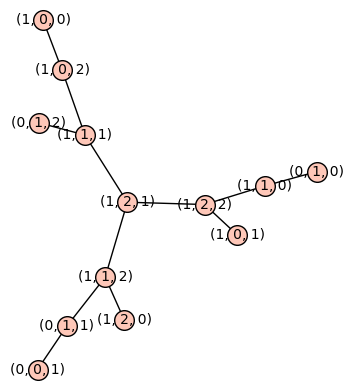

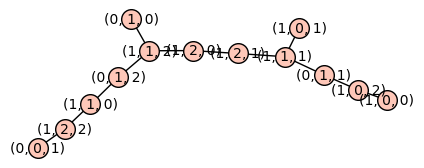

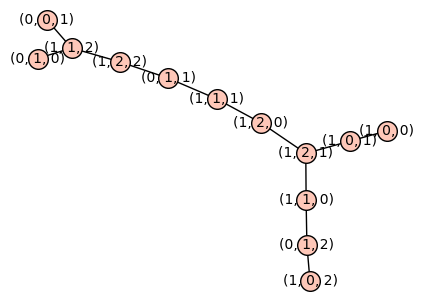

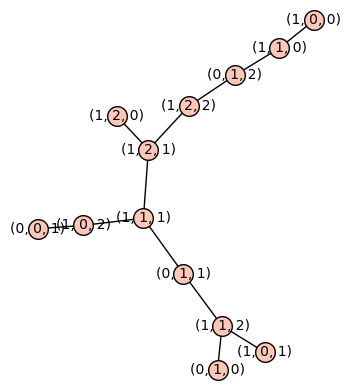

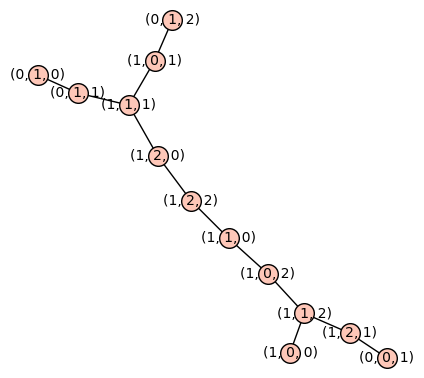

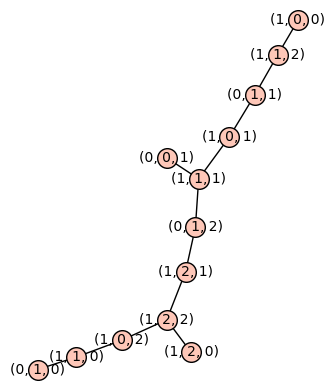

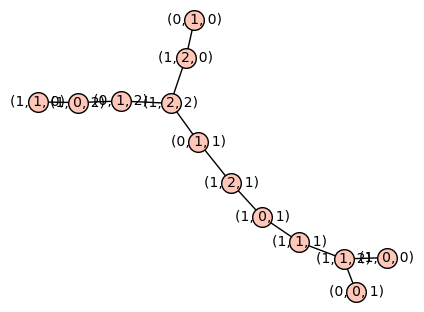

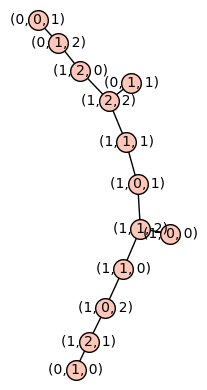

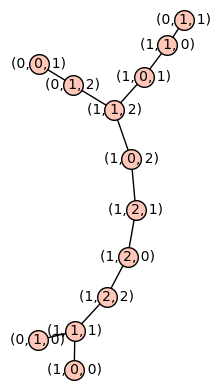

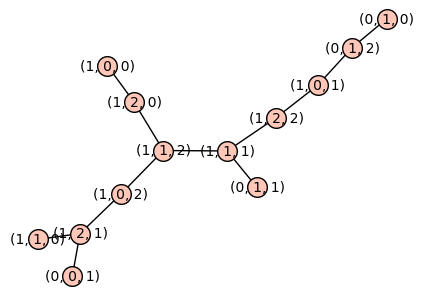

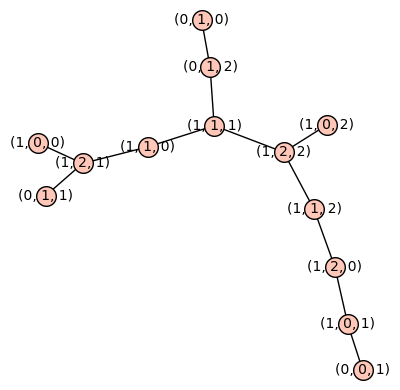

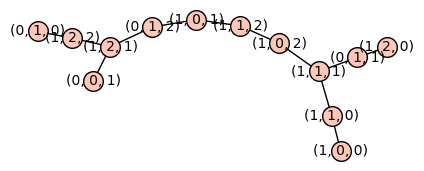

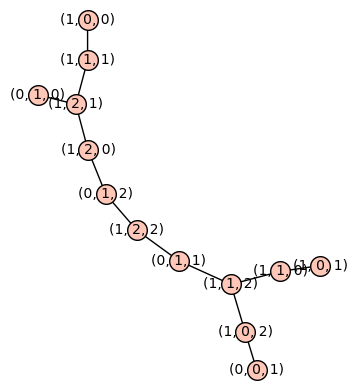

In [13]:
for rrr in newlist:
    [M1,M2,M3]=get_adj_matrix(rrr[0])
    #D1,D2,D3,D4=DiGraph(M1),DiGraph(M2),DiGraph(M3),DiGraph(M4)
    D= DiGraph(M1+M2+M3)
    D.relabel(vertex)
    #D1.relabel(vertex),D2.relabel(vertex),D3.relabel(vertex),D4.relabel(vertex)
    D.to_undirected().show()


In [38]:
D.graphplot(layout='spring')

GraphPlot object for Digraph on 13 vertices

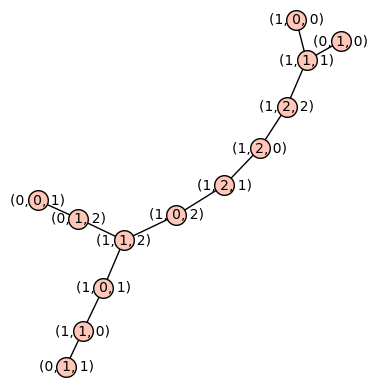

In [42]:
D.to_undirected().show()

In [ ]:
edge=get_edge(sing[0])
D=DiGraph(adj_matrix(edge))
D.relabel(vertex)
D

In [24]:
w[1]

x^3 + 2*x + 1

In [148]:
456/19

24

In [149]:
(q^n-1)^(n-1)

49

In [150]:
504/42

12

In [151]:
1512/42

36

In [137]:
from sympy import mobius, divisors

In [145]:
def Iq(n, q):
    test = [mobius(d)*pow(q, int(n)/d) for d in divisors(int(n))]
    return sum(test)/n

In [147]:
Iq(4,2)

3.00000000000000

In [45]:
3*factorial(5)

360